# Partícula libre

In [1]:
import openmm as mm
from openmm import unit
from openmm import app
import numpy as np
from matplotlib import pyplot as plt

## Creamos el sistema

In [2]:
molsys = mm.System()

In [3]:
molsys.addParticle(39.948 * unit.amu) # masa del átomo de argón

0

In [4]:
molsys.getNumParticles()

1

## Estado termodinámico

In [5]:
# Formalismo NVT
temperature = 300*unit.kelvin
pressure    = None

## Parametros de la simulación

In [6]:
integration_timestep = 0.001*unit.picoseconds
saving_timestep = 0.5*unit.picoseconds
simulation_time = 100*unit.picoseconds

saving_steps = int(saving_timestep/integration_timestep)
num_saving_steps = int(simulation_time/saving_timestep)

## Integrador

In [7]:
friction   = 25.0/unit.picosecond
integrator = mm.LangevinIntegrator(temperature, friction, integration_timestep)

## Plataforma

In [8]:
platform = mm.Platform.getPlatformByName('CUDA')

## Reporteros

In [9]:
times = np.zeros(num_saving_steps, np.float32) * unit.picoseconds
positions  = np.zeros([num_saving_steps,3], np.float32) * unit.angstroms
velocities = np.zeros([num_saving_steps,3], np.float32) * unit.angstroms/unit.picosecond
potential_energies   = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole
kinetic_energies     = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole

## Condiciones iniciales

In [10]:
initial_positions  = [[0.0, 0.0, 0.0]] * unit.angstroms

## Creamos el contexto

In [11]:
context = mm.Context(molsys, integrator, platform)

In [12]:
context.setPositions(initial_positions)

In [13]:
context.setVelocitiesToTemperature(temperature)

## Llenamos los reporteros para el paso 0

In [14]:
state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)

In [15]:
times[0] =  state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

## Corriendo la simulación

In [16]:
num_saving_steps

200

In [17]:
saving_steps

500

In [18]:
for ii in range(1,num_saving_steps):
    context.getIntegrator().step(saving_steps)
    state_xx = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state_xx.getTime()
    positions[ii] = state_xx.getPositions()[0]
    velocities[ii] = state_xx.getVelocities()[0]
    kinetic_energies[ii]=state_xx.getKineticEnergy()
    potential_energies[ii]=state_xx.getPotentialEnergy()
    print('Paso',ii,'con tiempo', state_xx.getTime())

Paso 1 con tiempo 0.5000000000000003 ps
Paso 2 con tiempo 1.0000000000000007 ps
Paso 3 con tiempo 1.4999999999999456 ps
Paso 4 con tiempo 1.9999999999998905 ps
Paso 5 con tiempo 2.4999999999998357 ps
Paso 6 con tiempo 2.9999999999997806 ps
Paso 7 con tiempo 3.4999999999997256 ps
Paso 8 con tiempo 3.9999999999996705 ps
Paso 9 con tiempo 4.4999999999998375 ps
Paso 10 con tiempo 5.000000000000004 ps
Paso 11 con tiempo 5.500000000000171 ps
Paso 12 con tiempo 6.000000000000338 ps
Paso 13 con tiempo 6.500000000000505 ps
Paso 14 con tiempo 7.000000000000672 ps
Paso 15 con tiempo 7.500000000000839 ps
Paso 16 con tiempo 8.000000000001005 ps
Paso 17 con tiempo 8.500000000000728 ps
Paso 18 con tiempo 9.000000000000451 ps
Paso 19 con tiempo 9.500000000000174 ps
Paso 20 con tiempo 9.999999999999897 ps
Paso 21 con tiempo 10.49999999999962 ps
Paso 22 con tiempo 10.999999999999343 ps
Paso 23 con tiempo 11.499999999999066 ps
Paso 24 con tiempo 11.999999999998789 ps
Paso 25 con tiempo 12.499999999998511

## Representamos los datos de la simulación

### Trayectoria

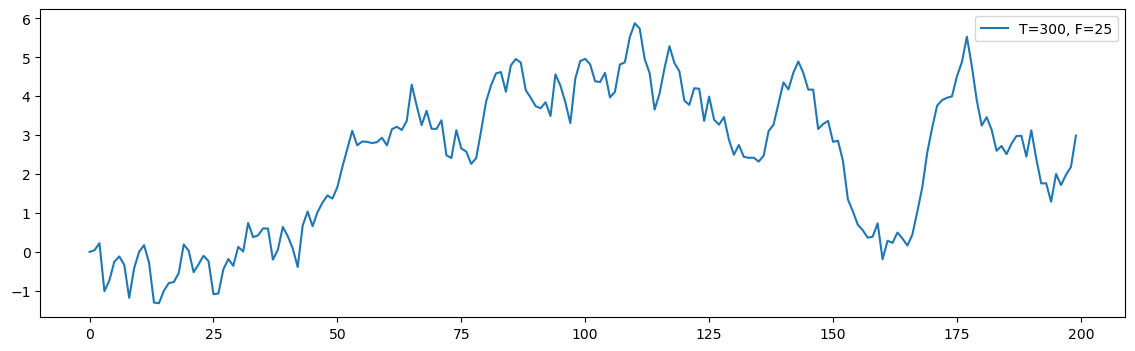

In [22]:
plt.rcParams['figure.figsize'] = 14, 4
plt.plot(positions[:,0], label='T=300, F=25')
plt.legend()
plt.show()

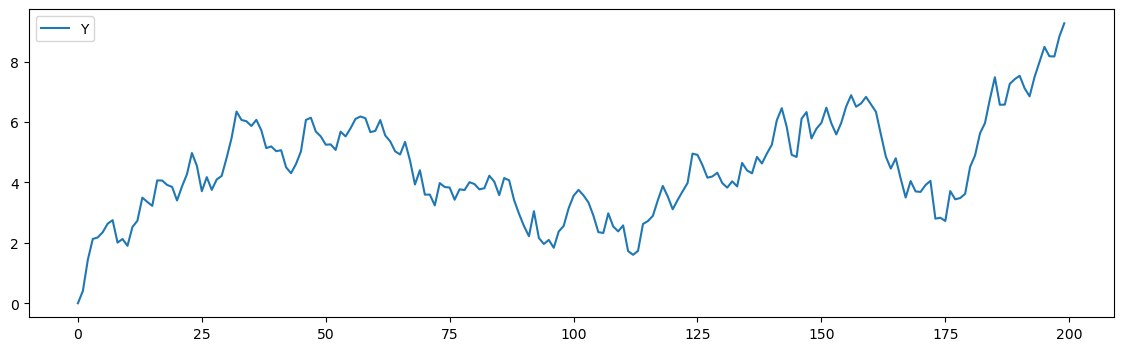

In [20]:
plt.plot(positions[:,1], label='Y')
plt.legend()
plt.show()

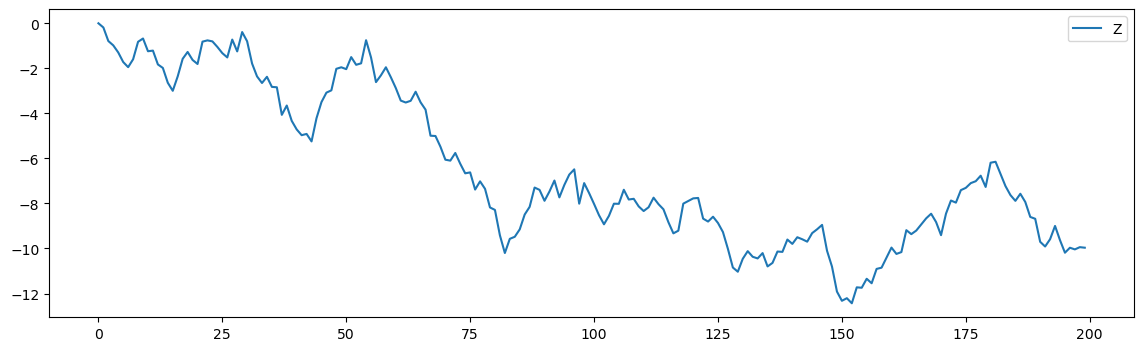

In [21]:
plt.plot(positions[:,2], label='Z')
plt.legend()
plt.show()

### En otro notebook... y con este como base:

- Grafica de energía cinética en función del tiempo.
- Gráfica de temperatura en función del tiempo.
- Energía cinética promedio, energía potencial promedio, temperatura promedio.
- Calcular la constante de difusión de la partícula.

In [ ]:
plt.rcParams['figure.figsize'] = 14, 4
plt.plot(times,kinetic_energies[:])
plt.ylabel('Kinetic Energy ('+str(kinetic_energies.unit)+')')
plt.xlabel('time ('+str(times.unit)+')')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = 14, 4
plt.plot(times,potential_energies[:])
plt.ylabel('Potential Energy ('+str(potential_energies.unit)+')')
plt.xlabel('time ('+str(times.unit)+')')
plt.show()